# PROJECT TITLE : **Predicting House Prices with Linear Regression**

### IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer  # Add this line
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

### LOADING DATASET

In [9]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
# Oveerview of numerical columns
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking Nulls
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
# Checking Duplicates
df.duplicated().sum()

0

### Price Distribution

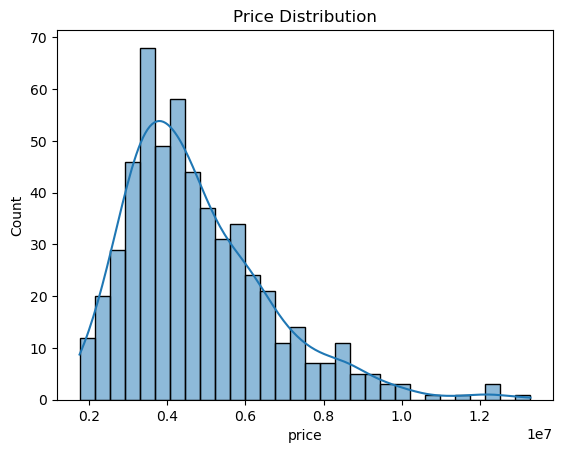

In [9]:
# Price Distribution
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Price Distribution");

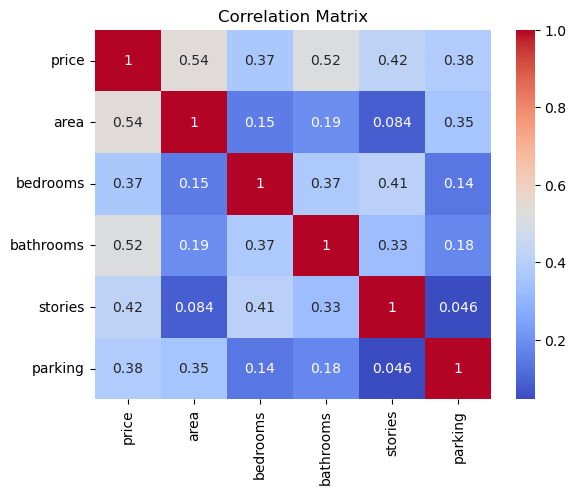

In [11]:
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix");

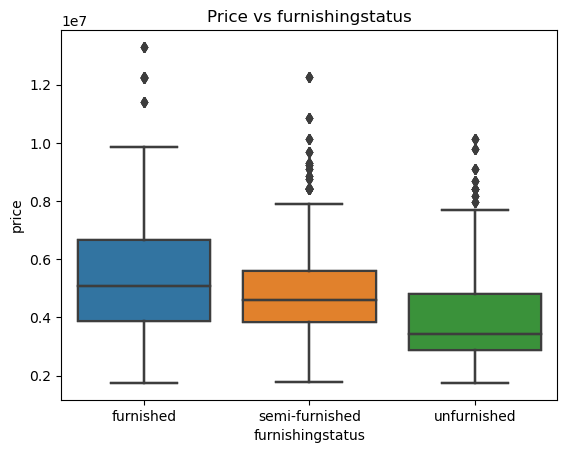

In [17]:
# Price vs Furnishing status
for col in categorical_columns:
    sns.boxplot(x="furnishingstatus", y='price', data=df)
    plt.title(f'Price vs {col}')

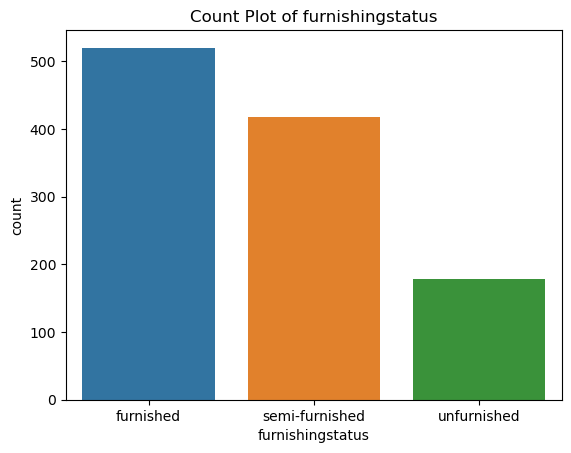

In [19]:
# Count plot of furnishing columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')

Text(0.5, 0.98, 'Distribution of Numerical Features')

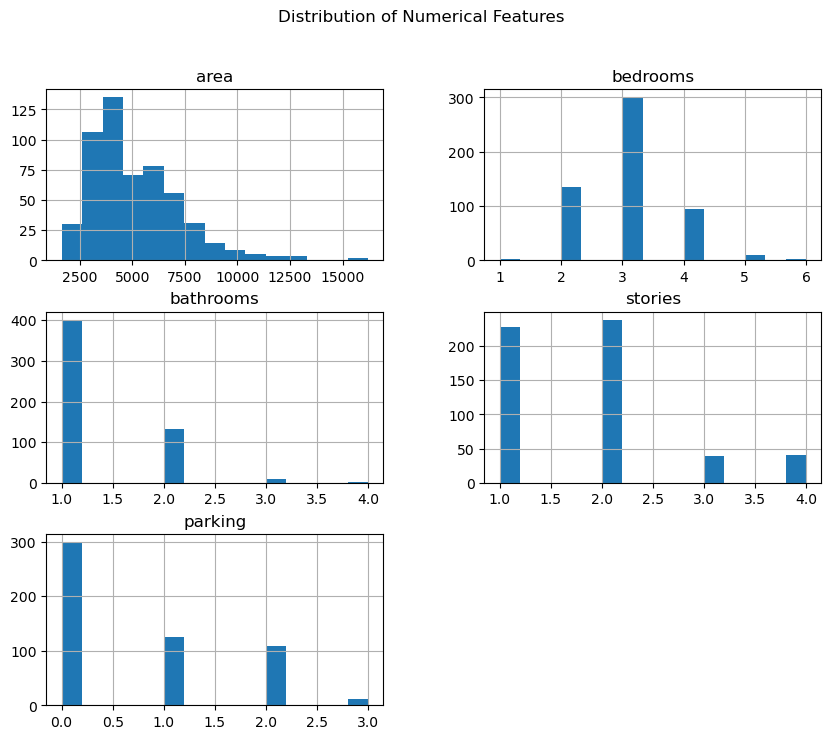

In [20]:
# Distribution of numerical features
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_columns].hist(figsize=(10, 8), bins=15)
plt.suptitle("Distribution of Numerical Features")

Text(0.5, 1.0, 'Price by Guestroom and Airconditioning')

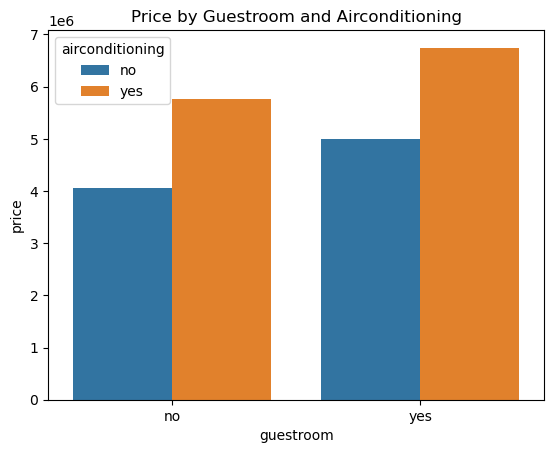

In [27]:
# Price by Guestroom and Airconditioning
grouped = df.groupby(['guestroom', 'airconditioning'])['price'].mean().reset_index()
sns.barplot(x='guestroom', y='price', hue='airconditioning', data=grouped)
plt.title("Price by Guestroom and Airconditioning");

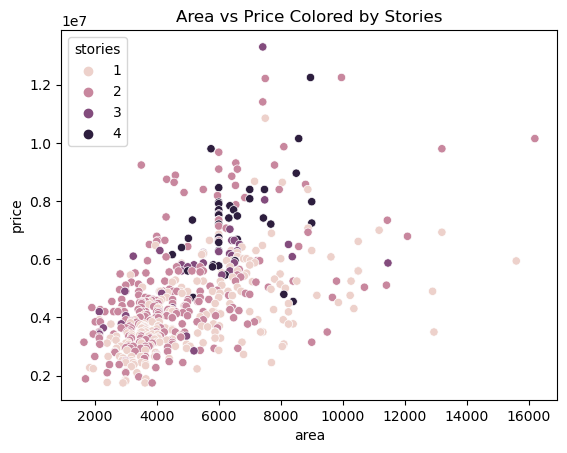

In [28]:
# Area vs Price Colored by Stories
sns.scatterplot(x='area', y='price', hue='stories', data=df)
plt.title("Area vs Price Colored by Stories");

<Figure size 500x500 with 0 Axes>

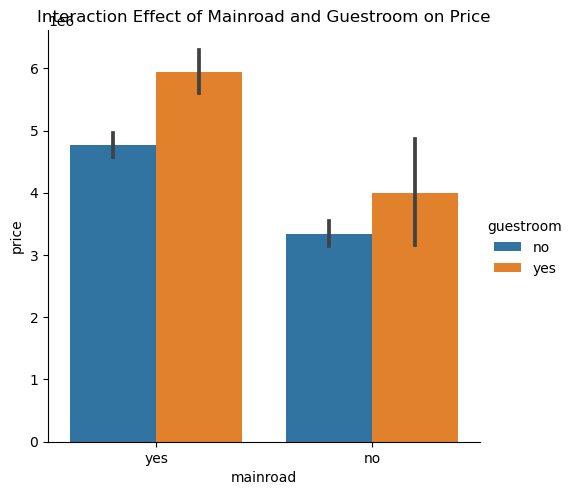

In [37]:
# Interaction Effect of Mainroad and Guestroom on Price
plt.figure(figsize=(5,5))
sns.catplot(x='mainroad', y='price', hue='guestroom', kind='bar', data=df)
plt.title("Interaction Effect of Mainroad and Guestroom on Price");

Text(0.5, 1.0, 'Proportion of Prefarea by Airconditioning')

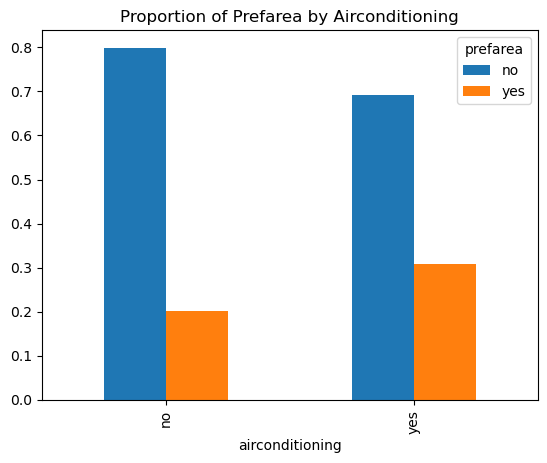

In [39]:
# Proportion of Prefarea by Airconditioning
pd.crosstab(df['airconditioning'], df['prefarea'], normalize='index').plot(kind='bar')
plt.title("Proportion of Prefarea by Airconditioning")

In [35]:
df["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [44]:
# Price Prediction Model

# Selected features
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']

# Splitting the data into features and target
X = df[numerical_columns + categorical_columns]
y = df['price']

# Preprocessing: OneHotEncoding for selected categorical and Scaling for numerical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

# Creating a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred).round(3)
mse = mean_squared_error(y_test, y_pred).round(3)
rmse = np.sqrt(mse).round(3)
r2 = ((r2_score(y_test, y_pred)).round(3))
r2_perc = (r2_score(y_test, y_pred)).round(3)*(100)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"R-squared in percentage (R2): {r2_perc}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 737003.67
Mean Squared Error (MSE): 1031254022524.482
Root Mean Squared Error (RMSE): 1015506.781
R-squared (R2): 0.664
R-squared in percentage (R2): 66.4


Text(0, 0.5, 'Predicted Prices')

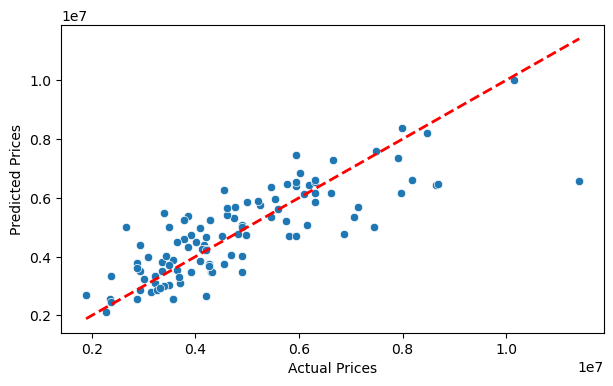

In [52]:
# Visual Representation
plt.figure(figsize=(7, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')